# Algorithmic Data Science : Lab 2

## Investigating the run-time of sorting algorithms

We have claimed that the run-time of the insertion_sort algorithm is given by:

$$c_a n^2$$

for a fixed constant $c_a$ when the length $n$ of the list is large. This is an empirical claim, i.e., something which can be verified.  

1) Obtain code for the algorithm (from the lecture notes) and plot the run-time for lists of different lengths (via code from last week's lab). 




In [15]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        item = alist[index]
        sofar = index - 1
        
        while sofar > -1 and alist[sofar] > item:
            alist[sofar+1] = alist[sofar]
            sofar -= 1
            
        alist[sofar+1] = item
    return alist
        

In [55]:
import numpy as np
import random
import time

def make_rand_list1(m,n=1):
    out = []
    for i in range(0,m,n):
        out.append(random.randint(1,1000))
        
    return out

def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

In [136]:
xs1 = [] 
ys1 = []

for i in range(100,25000,1000):
    xs1.append(i)
    list_1 = make_rand_list1(i)
    # list_1 = sorted(list_1,reverse=True)
    ys1.append(timeit(insertion_sort,list_1)[1])


In [130]:
print(ys1[:10])
print(xs1[:10])

[1.4483928680419922e-05, 0.0006081962585449219, 0.0018231296539306641, 0.003755011558532715, 0.006263782978057861, 0.009558532238006592, 0.012894747257232666, 0.017251133918762207, 0.021979985237121583, 0.02820030689239502]
[100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100]


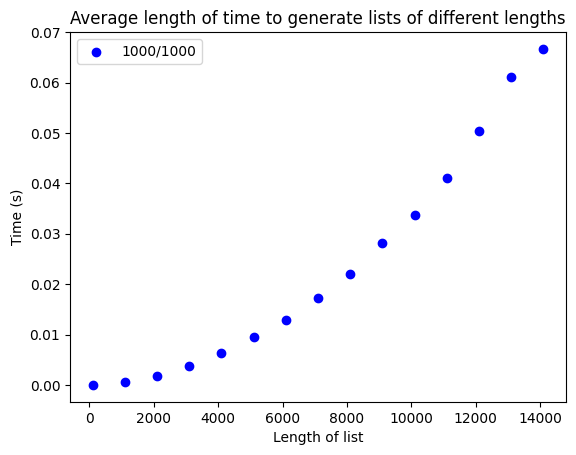

In [131]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.scatter(xs1,ys1,label='1000/1000',color='b')
# plt.ylim(0,0.0005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')
# plt.scatter(xs2,ys2,label='1000/2',color='r')
plt.legend(loc='upper left')

plt.show()

2) How can we know we have a quadratic curve $y=c_a x^2$ for insertion_sort and not a curve of $x$ to some other power, $y=c_a x^\alpha$? For this more general case, taking logs of both sides of the equation gives:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
So if we plot the log of the time taken against the log of the length of the list - assuming the function is indeed of the form $y=c_a x^\alpha$, the log-log plot will give us a straight line, and the gradient of this straight line will be $\alpha$ and the $y$ intercept will be $\log(c_a)$.

Create this log-log plot.

[5.29831737 5.70378247 5.99146455 6.2146081  6.39692966 6.55108034
 6.68461173 6.80239476 6.90775528 7.00306546]
[-10.0447369   -9.58236156  -9.08253943  -8.74288606  -8.51017357
  -8.24006394  -7.8042586   -7.71016836  -7.65555652  -7.5192741 ]


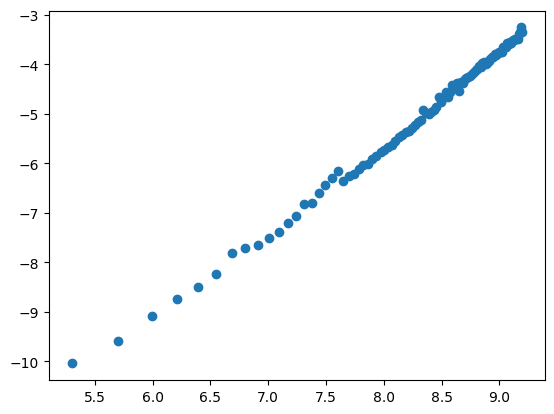

In [105]:
import math

logx1 = np.log(xs1[1:])
logy1 = np.log(ys1[1:])

plt.scatter(logx1, logy1)

print(logx1[:10])
print(logy1[:10])

3) Can you estimate the constant $c_a$ for your computer? Compare your value of $c_a$ with those of other students. 

(Tip: First estimate the gradient and intercept of the log-log plot using a function from a stats library, and then use that line fit to derive $c_a$. A good choice is the *linregress* function from the library *scipy.stats*. Import the library. Then see how to run the *linregress* function by Googling *scipy.stats.linregress* and reading the documentation for this function.)



In [91]:
from scipy.stats import linregress

linregress(logx1,logy1)

LinregressResult(slope=1.8078066768686671, intercept=-20.06596828262022, rvalue=0.997877503729798, pvalue=1.0630052917133462e-115, stderr=0.012040569637858843, intercept_stderr=0.10009938947356263)

4) What value do you get for $\alpha$? If you find $\alpha$ is not that close to 2, it's because the lists you're considering are not long enough for the time complexity to be behaving the way it does asymptotically for large $n$. See what happens to $\alpha$ if you do a plot using longer lists. Do you end up eventually with a value close to 2?

5) Recall that the official time complexity should be derived using the worst case scenario. Did you think to use lists that lead to the worst case scenario? If you did plots just based on completely random lists, then you were obtaining average scenarios. Can you do the worst case scenario and the best case scenario? How do these and the average scenario differ?

In [99]:
# worst case
worst_xs1 = [] 
worst_ys1 = []

for i in range(100,10000,100):
    worst_xs1.append(i)
    list_1 = make_rand_list1(i)
    list_1 = sorted(list_1,reverse=True)
    worst_ys1.append(timeit(insertion_sort,list_1)[1])


worst_logx1 = np.log(worst_xs1)
worst_logy1 = np.log(worst_ys1)

linregress(worst_logx1,worst_logy1)

'''in the worst case the list is sorted in reverse order. In the worst case the algorithm will take n**2 as its time complexity.'''

'in the worst case the list is sorted in reverse order. In the worst case the algorithm will take n**2 as its time complexity.'

In [98]:
# best case
best_xs1 = [] 
best_ys1 = []

for i in range(100,1000,100):
    best_xs1.append(i)
    list_1 = make_rand_list1(i)
    list_1 = sorted(list_1)
    best_ys1.append(timeit(insertion_sort,list_1)[1])


best_logx1 = np.log(best_xs1)
best_logy1 = np.log(best_ys1)



'''
This solution is linear which is to be expected as the list ist already sorted.
'''

linregress(best_logx1,best_logy1)

LinregressResult(slope=0.9730495321229995, intercept=-15.472354611393426, rvalue=0.998356079714404, pvalue=2.890587120197367e-122, stderr=0.00567205494733854, intercept_stderr=0.046989314734037405)

6) How accurate can you make your estimate of $c_a$?  What is the standard deviation / error in your measurements? (Tip: The linear regression function you used has the ability to give you the standard error for the estimates of the slope and intercept.)



7) Repeat your experiments while your computer is heavily loaded (e.g. running some video processing in the background), and compare the results.

Now repeat the whole exercise for the merge_sort algorithm, which we theoretically expect to run in

$$c_bn\log(n)$$

for a fixed constant $c_b$ when the length of the list is large. In this case we cannot (sensibly) log both sides.  However we can use a transformation $x=n \log n$.  If we plot $y$=time-taken against this $x$ then we should get a straight line graph with gradient $c_b$ and $y$-intercept $\approx$ 0.

In [107]:
# Mergesort Algorithm

# MergeSort in Python


def mergeSort(array):
    if len(array) > 1:

        #  r is the point where the array is divided into two subarrays
        r = len(array)//2
        L = array[:r]
        M = array[r:]

        # Sort the two halves
        mergeSort(L)
        mergeSort(M)

        i = j = k = 0

        # Until we reach either end of either L or M, pick larger among
        # elements L and M and place them in the correct position at A[p..r]
        while i < len(L) and j < len(M):
            if L[i] < M[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = M[j]
                j += 1
            k += 1

        # When we run out of elements in either L or M,
        # pick up the remaining elements and put in A[p..r]
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            array[k] = M[j]
            j += 1
            k += 1

    return array

array = [6, 5, 12, 10, 9, 1]

mergeSort(array)


[1, 5, 6, 9, 10, 12]

In [134]:
mxs1 = [] 
mys1 = []

for i in range(100,25000,1000):
    mxs1.append(i)
    list_1 = make_rand_list1(i)
    # list_1 = sorted(list_1,reverse=True)
    mys1.append(timeit(mergeSort,list_1)[1])

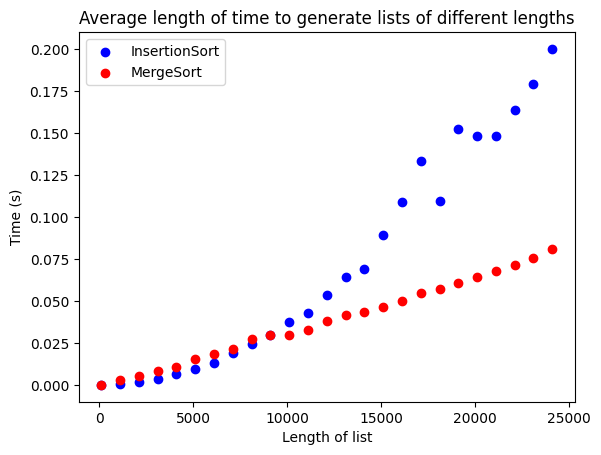

In [137]:
import matplotlib.pyplot as plt

plt.subplot(111)
plt.scatter(xs1,ys1,label='InsertionSort',color='b')
# plt.ylim(0,0.0005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')
plt.scatter(mxs1,mys1,label='MergeSort',color='r')
plt.legend(loc='upper left')

plt.show()

In [138]:
def longest(a1, a2):
    arr = [0]*26
    for s in a1:
        arr[ord(s)-ord('a')] = 1
    for s in a2:
        arr[ord(s)-ord('a')] = 1
    solution = ""
    for i in range(len(arr)):
        if arr[i] == 1:
            solution += chr(ord('a')+i)
            
    return solution

In [146]:
import string

def make_rand_string(m,n=1):
    ref = string.ascii_lowercase
    out = []
    for i in range(0,m,n):
        no = random.randint(0,len(ref)-1)
        out.append(ref[no])
        
    return ''.join(out)


In [179]:
def longest(a1, a2):
    arr = [0]*26
    for s in a1:
        arr[ord(s)-ord('a')] = 1
    for s in a2:
        arr[ord(s)-ord('a')] = 1
    solution = ""
    for i in range(len(arr)):
        if arr[i] == 1:
            solution += chr(ord('a')+i)
            
    return solution

def longest2(a1, a2):
    return ''.join(sorted(set(a1+a2)))

In [180]:
longest2(make_rand_string(200),make_rand_string(200))

'abcdefghijklmnopqrstuvwxyz'

In [160]:
x = []
y = []

xx = []
yy = []

for i in range(1,250000,10000):
    x.append(i)
    xx.append(i)
    s1 = make_rand_string(i)
    s2 = make_rand_string(i)

    y.append(timeit(longest,s1,s2)[1])
    yy.append(timeit(longest2,s1,s2)[1])
    


In [196]:
import itertools

keywords = [''.join(i) for i in itertools.product(':;)D-~', repeat = 3)]

len(keywords)

216

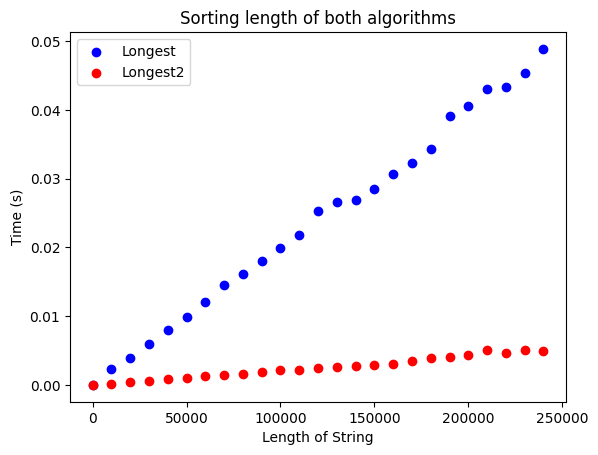

In [161]:
plt.subplot(111)
plt.scatter(x,y,label='Longest',color='b')
# plt.ylim(0,0.0005)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of String')
plt.ylabel('Time (s)')
plt.title('Sorting length of both algorithms')
plt.scatter(xx,yy,label='Longest2',color='r')
plt.legend(loc='upper left')

plt.show()